In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pandas import DataFrame

data = pd.read_csv("../resources/data/Sleep_health_and_lifestyle_dataset.csv")

data["Gender"].value_counts

<bound method IndexOpsMixin.value_counts of 0        Male
1        Male
2        Male
3        Male
4        Male
        ...  
369    Female
370    Female
371    Female
372    Female
373    Female
Name: Gender, Length: 374, dtype: object>

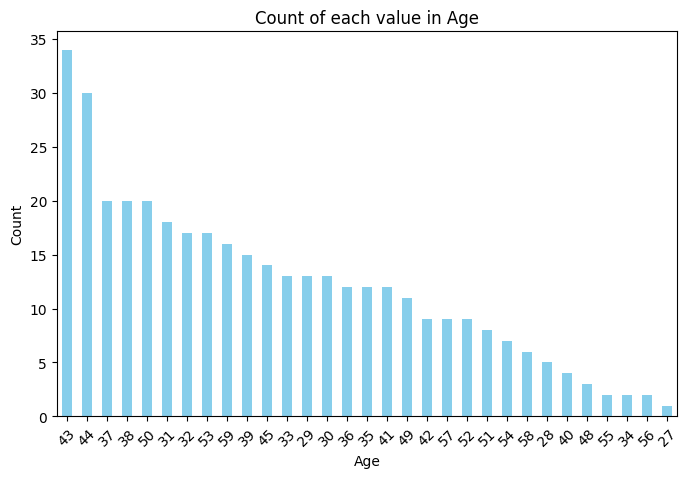

In [33]:
def plot_column_counts(data: DataFrame, column: str):
    counts = data[column].value_counts()
    plt.figure(figsize=(8, 5))
    counts.plot(kind='bar', color='skyblue')
    plt.title(f'Count of each value in {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

plot_column_counts(data, "Age")


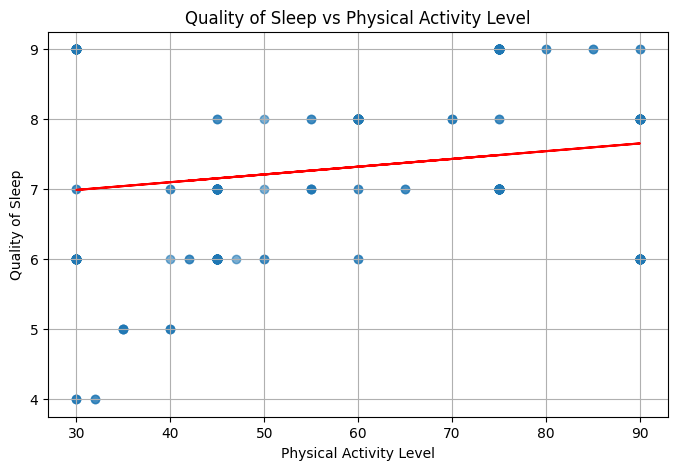

In [34]:
def plot_scatter(data: DataFrame, x_col: str, y_col: str, range = 0.6):
    #Procesar la información antes de mostrarla en caso de outliers. 
    values_x = data[x_col]
    values_y = data[y_col]
    x_low, x_high = values_x.quantile(0.5-range/2), values_x.quantile(0.5+range/2)
    y_low, y_high = values_y.quantile(0.5-range/2), values_y.quantile(0.5+range/2)
    mask = (values_x >= x_low) & (values_x <= x_high) & (values_y >= y_low) & (values_y <= y_high)
    filtering = data[mask]

    plt.figure(figsize=(8, 5))
    plt.scatter(filtering[x_col], filtering[y_col], alpha=0.6)

    values_x = filtering[x_col]
    values_y = filtering[y_col]
    coeffs = np.polyfit(values_x, values_y, 1)
    fit_line = np.poly1d(coeffs)
    plt.plot(values_x, fit_line(values_x), color='red', label='Linea de mejor ajuste')
    plt.title(f'{y_col} vs {x_col}')
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.grid(True)
    plt.show()


plot_scatter(data, 'Physical Activity Level', 'Quality of Sleep', 1)

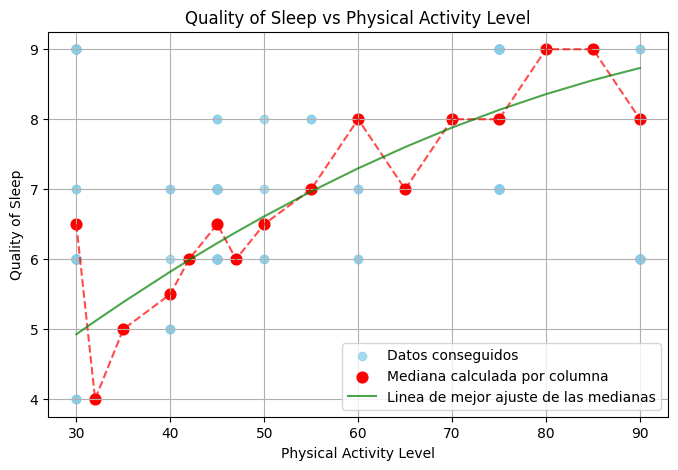

In [39]:
# Plot all non-outlier points, and overlay the median per x value

def plot_points_and_grouped_median(data: DataFrame, x_col: str, y_col: str, lower=0.00, upper=1):
    # Exclude outliers in y_col for each x_col group, but keep all non-outlier points
    filtered_points_x = []
    filtered_points_y = []
    medians = []
    x_vals = []
    grouped = data.groupby(x_col)
    for x_val, group in grouped:
        y = group[y_col]
        y_low, y_high = y.quantile(lower), y.quantile(upper)
        y_filtered = y[(y >= y_low) & (y <= y_high)]
        if not y_filtered.empty:
            filtered_points_x.extend([x_val]*len(y_filtered))
            filtered_points_y.extend(y_filtered)
            x_vals.append(x_val)
            medians.append(y_filtered.median())
    plt.figure(figsize=(8, 5))
    plt.scatter(filtered_points_x, filtered_points_y, color='skyblue', alpha=0.7, label='Datos conseguidos')
    plt.scatter(x_vals, medians, color='red', s=60, label='Mediana calculada por columna')
    plt.plot(x_vals, medians, color='red', linestyle='--', alpha=0.7)

    coeffs = np.polyfit(x_vals, medians, 2)
    fit_line = np.poly1d(coeffs)
    plt.plot(x_vals, fit_line(x_vals), color='green', alpha=0.7, label = 'Linea de mejor ajuste de las medianas')
    plt.title(f'{y_col} vs {x_col}')
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage:
plot_points_and_grouped_median(data, 'Physical Activity Level', 'Quality of Sleep', lower=0, upper=1)


In [ ]:
# Bar graph: average Quality of Sleep for each Physical Activity Level

def bar_avg_by_group(data: DataFrame, x_col: str, y_col: str):
    avg = data.groupby(x_col)[y_col].mean().reset_index()
    plt.figure(figsize=(10, 6))
    plt.bar(avg[x_col], avg[y_col], color='cornflowerblue')
    plt.xlabel(x_col)
    plt.ylabel(f'Average {y_col}')
    plt.title(f'Average {y_col} for each {x_col}')
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.show()

# Example usage:
bar_avg_by_group(data, 'Physical Activity Level', 'Quality of Sleep')
